# Bài 1: Phương pháp lặp đơn
a) Hãy áp dụng phương pháp lặp đơn $x_{n+1} = 1 + e^{-x_n}$ để giải phương trình $ 1 + e^{-x} - x  = 0 $? \\
\textbf{Đề thi viết yêu cầu phải kiểm tra tính chất ánh xạ co. Đề lập trình yêu cầu phải vẽ hình để thể hiện rõ ràng tính tự ánh và tính co của ánh xạ.} \\
b) Sử dụng phương pháp lặp đơn trên và công thức ước lượng tiên nghiệm để tìm $n$ sao cho sai số tuyệt đối của $x_n$, với $x_0 = 1.5$, $\leq 1e-5$.

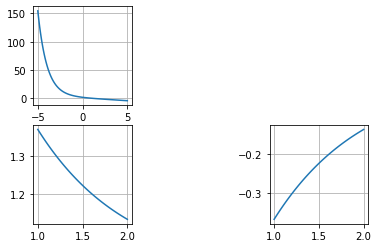

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Part a
f = lambda x: 1+ np.exp(-x)-x

g = lambda x: 1+ np.exp(-x)
dg = lambda x: -np.exp(-x)

T = np.linspace(-5,5,100)
T1 = np.linspace(1,2,100)

plt.subplot(2,3,1)
plt.plot(T,f(T))
plt.grid()

plt.subplot(2,3,4)
plt.plot(T1,g(T1))
plt.grid()

plt.subplot(2,3,6)
plt.plot(T1,dg(T1))
plt.grid()
plt.show()

In [14]:
# Giai phuong trinh f(x)=0 nhung duoc viet duoi dang moi  x= g(x)
"""
g : ham so, x0: gia tri ban dau, bat ky
nmax : so luong toi da cac phep lap, tol: sai so
x0 : nghiem, i: so luong phep lap thuc te de dat duoc sai so tol
"""
def lapdon(g,x0,nmax,tol):    
    i = 1;
    
    for i in range(nmax):
        x1 = g(x0); 
        g1 = g(x1);
        if abs(x1-g1)>tol :
            x0 = x1;
            x1 = g(x1);
            g1 = g(x1);
            i += 1;
        else:
            print("No la ---",x1);
            print("so phep lap la: ",i)
            break
        if i>nmax:
            print("Co the phep lap don nay 0 cho ket qua")
            x1 = None;
    return x1, i

In [15]:
x, i = lapdon(g,1.5,100,1e-5)

No la --- 1.2784718839153602
so phep lap la:  7


# Bài 2
Sử dụng phương pháp bình phương tối thiểu với phân tích QR, hãy tìm hàm có dạng $f(x) = A \sqrt{x+1}+ Bx$ để xấp xỉ tốt nhất bảng số liệu sau. 
\begin{center}
	\begin{tabular}[5]{l|l|l|l|l|l}
		x    & 4 & 5 & 6 & 7 & 8 \\ \hline
		f(x) & 1 & 2.5 & 1.2 & 3.3 & 1.4 \\
	\end{tabular}	
\end{center}

In [28]:
x = np.array([4, 5, 6, 7, 8])
x1 = np.sqrt(x+np.ones(np.size(x)))

A1 = np.vstack((x1,x)).T
print(A1)

y = np.array([1,2.5,1.2,3.3,1.4]).T

import numpy.linalg as la
Q, R = la.qr(A1)
x = la.solve(R,Q.T@y)
print("The vector solution [A B] is: ",x)

[[2.23606798 4.        ]
 [2.44948974 5.        ]
 [2.64575131 6.        ]
 [2.82842712 7.        ]
 [3.         8.        ]]
The vector solution [A B] is:  [0.65723978 0.0255377 ]


# Bài 3
Cho bảng số liệu sau. 
\begin{center}
	\begin{tabular}[5]{l|l|l|l|l} 
		x    & 0.97 & 1.00 & 1.05 \\ \hline
		y(x) & 0.8504 & 0.8415 & 0.8261 \\
	\end{tabular}	
\end{center}
% 
Sử dụng bảng số liệu trên, hãy thực hiện các yêu cầu sau: \\
a) Tính gần đúng đa thức nội suy $y'(x)$ tại $x=1$.\\
b) Tính gần đúng đa thức nội suy $y"(x)$ tại $x=1$.	

# Bài 4
Xét bài toán Cauchy  
\begin{align}
	y'(x) &= y \ (x+1), \quad 1 \leq x, \\
	y(1)  &= 2 \ . 
\end{align}
%
a) Sử dụng phương pháp Heun, tính xấp xỉ $y(x)$ tại $x=1.2$ với bước $h = 0.1$. \\
b) Sử dụng phương pháp Euler ẩn, tính xấp xỉ $y(x)$ tại $x=1.2$ với bước $h = 0.1$. \\	

In [30]:
def euler_imp(f,y0,x0,xf,N):  
    
    import numpy as np
    
    I = np.linspace(x0,xf,N) ;
    h = (xf-x0)/N ; 
       
    y_old = y0 ; y = [y0];
    
    for i in range(1,N):        
        # y_new = y_old + h * f(I[i],y_old) ;  # Theo CT Euler an: y_{i+1} = y_i + h * f(x_{i+1}, y_{i+1}) => Giai pt
        
        f2 = lambda y_new: y_new - y_old - h * f(I[i],y_new)
        # Neu 0 co Newton thi dung ham san co fsolve (solve, linsolve)
        from scipy.optimize import fsolve
        y_new = fsolve(f2,y_old)
        
        y_old = y_new        
        y.append(y_new)  
       
    return I, y

C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


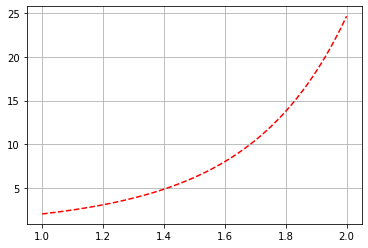

The value of y at x = 1.2 by implicit Euler is [3.06136719]


In [37]:
f = lambda x, y: y * (x+1)
y0, x0, xf, N = 2, 1, 2, 100
x, y = euler_imp(f,y0,x0,xf,N)

import matplotlib.pyplot as plt
plt.plot(x,y,'r--')
plt.grid()
plt.show()

print("The value of y at x = 1.2 by implicit Euler is",y[20])

In [38]:
def Heun(f,t0,tf,x0,n):
    import numpy as np
    I = np.linspace(t0,tf,n+1) ;
    h = (tf-t0)/n ;
    x = [x0];    
    xi = x0 ;
    
    for i in range(0,n):        
        y_ip1 = xi + h * f(I[i],xi) ;
        x_ip1 = xi + h/2 * ( f(I[i],xi) + f(I[i+1],y_ip1) );
        xi = x_ip1 ;          
        x.append(x_ip1)
        #x = np.array([x, xi]);        
        
    return I, x   

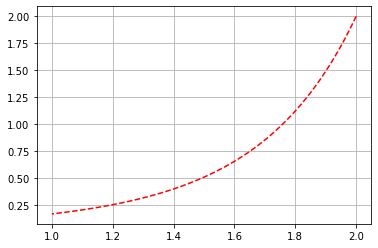

The value of y at x = 1.2 by Heun is 1.1198898596795077


In [39]:
f = lambda x, y: y * (x+1)
y0, x0, xf, N = 2, 1, 2, 100
x, y = Heun(f,y0,x0,xf,N)

import matplotlib.pyplot as plt
plt.plot(x,y,'r--')
plt.grid()
plt.show()

print("The value of y at x = 1.2 by Heun is",y[20])